# Cryptocurrency Analysis 

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# Define a list of 30 cryptocurrencies
cryptos = ["BTC-USD", "ETH-USD", "XRP-USD", "LTC-USD", "ADA-USD", "DOT1-USD", "XLM-USD", "LINK-USD", 
           "BNB-USD", "DOGE-USD", "SOL1-USD", "USDC-USD", "UNI3-USD", "WBTC-USD", "ATOM1-USD", "AVAX-USD", 
           "LUNA1-USD", "FIL-USD", "TRX-USD", "XEM-USD", "MIOTA-USD", "XTZ-USD", "AAVE-USD", "EOS-USD", 
           "FTT-USD", "ALGO-USD", "XMR-USD", "NEO-USD", "MKR-USD"]

# Download historical data for the past year
data = yf.download(cryptos, start="2023-01-01", end="2024-01-01")
data.head(3)

[*********************100%%**********************]  29 of 29 completed

5 Failed downloads:
['ATOM1-USD', 'LUNA1-USD', 'UNI3-USD', 'SOL1-USD', 'DOT1-USD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2024-01-01)')


Price       Adj Close                                                       \
Ticker       AAVE-USD   ADA-USD  ALGO-USD ATOM1-USD   AVAX-USD     BNB-USD   
Date                                                                         
2023-01-01  52.045834  0.249771  0.177466       NaN  10.865915  244.136978   
2023-01-02  53.083157  0.253828  0.181194       NaN  11.153615  245.535904   
2023-01-03  53.040043  0.252796  0.184302       NaN  11.384450  246.133362   

Price                                                  ...   Volume  \
Ticker           BTC-USD  DOGE-USD DOT1-USD   EOS-USD  ... SOL1-USD   
Date                                                   ...            
2023-01-01  16625.080078  0.070225      NaN  0.878446  ...      NaN   
2023-01-02  16688.470703  0.071454      NaN  0.881972  ...      NaN   
2023-01-03  16679.857422  0.070468      NaN  0.880312  ...      NaN   

Price                                                                    \
Ticker        TRX-USD UNI3-USD    USDC-USD  WBTC-USD  XEM-USD   XLM-USD   
Date                                                                      
2023-01-01  100273280      NaN  1197927576  31584913  5124431  34017236   
2023-01-02  138920680      NaN  1562545140  43003000  4561089  59178367   
2023-01-03  130813322      NaN  2006189065  28296160  4871830  41886099   

Price                                       
Ticker       XMR-USD     XRP-USD   XTZ-USD  
Date                                        
2023-01-01  36453347   290828851  11060139  
2023-01-02  47050925  1325787126  14341386  
2023-01-03  48662135   811872325  18043246  

[3 rows x 174 columns]

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Columns: 174 entries, ('Adj Close', 'AAVE-USD') to ('Volume', 'XTZ-USD')
dtypes: float64(151), int64(23)
memory usage: 499.0 KB


In [3]:
data.describe()

Price    Adj Close                                                            \
Ticker    AAVE-USD     ADA-USD    ALGO-USD ATOM1-USD    AVAX-USD     BNB-USD   
count   365.000000  365.000000  365.000000       0.0  365.000000  365.000000   
mean     74.360124    0.347091    0.161087       NaN   16.402957  266.591477   
std      14.433729    0.086883    0.056705       NaN    7.566502   42.033512   
min      50.138336    0.241873    0.088541       NaN    8.787722  205.229416   
25%      63.703468    0.280354    0.110515       NaN   11.781206  231.868744   
50%      72.008186    0.345761    0.148217       NaN   14.680552  248.538330   
75%      83.794533    0.383383    0.214095       NaN   17.874453  309.245636   
max     118.968285    0.665244    0.290014       NaN   48.345203  348.220917   

Price                                                  ...   Volume  \
Ticker       BTC-USD    DOGE-USD DOT1-USD     EOS-USD  ... SOL1-USD   
count     365.000000  365.000000      0.0  365.000000  ...      0.0   
mean    28859.448250    0.074967      NaN    0.840364  ...      NaN   
std      5899.981222    0.010423      NaN    0.215284  ...      NaN   
min     16625.080078    0.057897      NaN    0.534572  ...      NaN   
25%     25931.472656    0.065987      NaN    0.674411  ...      NaN   
50%     27767.236328    0.073613      NaN    0.781599  ...      NaN   
75%     30315.355469    0.081845      NaN    1.043414  ...      NaN   
max     44166.601562    0.101801      NaN    1.328770  ...      NaN   

Price                                                                    \
Ticker       TRX-USD UNI3-USD      USDC-USD      WBTC-USD       XEM-USD   
count   3.650000e+02      0.0  3.650000e+02  3.650000e+02  3.650000e+02   
mean    2.279802e+08      NaN  3.753605e+09  1.429882e+08  1.218817e+07   
std     1.002191e+08      NaN  1.926019e+09  8.618442e+07  2.914615e+07   
min     9.534694e+07      NaN  1.036839e+09  1.947240e+07  1.745854e+06   
25%     1.681243e+08      NaN  2.648161e+09  8.686291e+07  6.028396e+06   
50%     2.068623e+08      NaN  3.419784e+09  1.222174e+08  8.125783e+06   
75%     2.524317e+08      NaN  4.416719e+09  1.763570e+08  1.139802e+07   
max     8.320820e+08      NaN  2.668221e+10  7.496820e+08  4.710244e+08   

Price                                                           
Ticker       XLM-USD       XMR-USD       XRP-USD       XTZ-USD  
count   3.650000e+02  3.650000e+02  3.650000e+02  3.650000e+02  
mean    9.069971e+07  7.597646e+07  1.241139e+09  2.418207e+07  
std     9.356887e+07  2.318381e+07  8.512204e+08  2.068541e+07  
min     2.239364e+07  3.125585e+07  2.908289e+08  7.785187e+06  
25%     4.820649e+07  5.940040e+07  7.865104e+08  1.416883e+07  
50%     6.969591e+07  7.658360e+07  1.066790e+09  1.995959e+07  
75%     1.019675e+08  9.081227e+07  1.454332e+09  2.816287e+07  
max     1.004593e+09  1.652333e+08  1.039734e+10  3.048512e+08  

[8 rows x 174 columns]

In [4]:
# Filter out cryptocurrencies with no data
new_data = data.dropna(axis=1, how='all')
new_data.head(3)

Price       Adj Close                                             \
Ticker       AAVE-USD   ADA-USD  ALGO-USD   AVAX-USD     BNB-USD   
Date                                                               
2023-01-01  52.045834  0.249771  0.177466  10.865915  244.136978   
2023-01-02  53.083157  0.253828  0.181194  11.153615  245.535904   
2023-01-03  53.040043  0.252796  0.184302  11.384450  246.133362   

Price                                                                ...  \
Ticker           BTC-USD  DOGE-USD   EOS-USD      ETH-USD   FIL-USD  ...   
Date                                                                 ...   
2023-01-01  16625.080078  0.070225  0.878446  1200.964844  3.111418  ...   
2023-01-02  16688.470703  0.071454  0.881972  1214.656616  3.147882  ...   
2023-01-03  16679.857422  0.070468  0.880312  1214.778809  3.092895  ...   

Price         Volume                                                      \
Ticker       MKR-USD   NEO-USD    TRX-USD    USDC-USD  WBTC-USD  XEM-USD   
Date                                                                       
2023-01-01  16845169  29704094  100273280  1197927576  31584913  5124431   
2023-01-02  17552136  21429617  138920680  1562545140  43003000  4561089   
2023-01-03  19088773  26527547  130813322  2006189065  28296160  4871830   

Price                                                 
Ticker       XLM-USD   XMR-USD     XRP-USD   XTZ-USD  
Date                                                  
2023-01-01  34017236  36453347   290828851  11060139  
2023-01-02  59178367  47050925  1325787126  14341386  
2023-01-03  41886099  48662135   811872325  18043246  

[3 rows x 144 columns]

In [5]:
# Access the 'Close' data using the 'Price' level
close_data = new_data['Close']

# Display the extracted data
print("\nExtracted Close Data:")
print(close_data.head(3))


Extracted Close Data:
Ticker       AAVE-USD   ADA-USD  ALGO-USD   AVAX-USD     BNB-USD  \
Date                                                               
2023-01-01  52.045834  0.249771  0.177466  10.865915  244.136978   
2023-01-02  53.083157  0.253828  0.181194  11.153615  245.535904   
2023-01-03  53.040043  0.252796  0.184302  11.384450  246.133362   

Ticker           BTC-USD  DOGE-USD   EOS-USD      ETH-USD   FIL-USD  ...  \
Date                                                                 ...   
2023-01-01  16625.080078  0.070225  0.878446  1200.964844  3.111418  ...   
2023-01-02  16688.470703  0.071454  0.881972  1214.656616  3.147882  ...   
2023-01-03  16679.857422  0.070468  0.880312  1214.778809  3.092895  ...   

Ticker         MKR-USD   NEO-USD   TRX-USD  USDC-USD      WBTC-USD   XEM-USD  \
Date                                                                           
2023-01-01  513.018738  6.396228  0.054820  0.999993  16561.123047  0.028817   
2023-01-02  511

In [6]:
close_data.count()

Ticker
AAVE-USD     365
ADA-USD      365
ALGO-USD     365
AVAX-USD     365
BNB-USD      365
BTC-USD      365
DOGE-USD     365
EOS-USD      365
ETH-USD      365
FIL-USD      365
FTT-USD      365
LINK-USD     365
LTC-USD      365
MIOTA-USD    277
MKR-USD      365
NEO-USD      365
TRX-USD      365
USDC-USD     365
WBTC-USD     365
XEM-USD      365
XLM-USD      365
XMR-USD      365
XRP-USD      365
XTZ-USD      365
dtype: int64

In [7]:
# Interpolate missing values
close_data['MIOTA-USD'] = close_data['MIOTA-USD'].interpolate()

# Display the extracted data after interpolation
print("\nExtracted Close Data after Interpolation:")
print(close_data.head(3))



Extracted Close Data after Interpolation:
Ticker       AAVE-USD   ADA-USD  ALGO-USD   AVAX-USD     BNB-USD  \
Date                                                               
2023-01-01  52.045834  0.249771  0.177466  10.865915  244.136978   
2023-01-02  53.083157  0.253828  0.181194  11.153615  245.535904   
2023-01-03  53.040043  0.252796  0.184302  11.384450  246.133362   

Ticker           BTC-USD  DOGE-USD   EOS-USD      ETH-USD   FIL-USD  ...  \
Date                                                                 ...   
2023-01-01  16625.080078  0.070225  0.878446  1200.964844  3.111418  ...   
2023-01-02  16688.470703  0.071454  0.881972  1214.656616  3.147882  ...   
2023-01-03  16679.857422  0.070468  0.880312  1214.778809  3.092895  ...   

Ticker         MKR-USD   NEO-USD   TRX-USD  USDC-USD      WBTC-USD   XEM-USD  \
Date                                                                           
2023-01-01  513.018738  6.396228  0.054820  0.999993  16561.123047  0.02881

In [8]:
close_data.count()

Ticker
AAVE-USD     365
ADA-USD      365
ALGO-USD     365
AVAX-USD     365
BNB-USD      365
BTC-USD      365
DOGE-USD     365
EOS-USD      365
ETH-USD      365
FIL-USD      365
FTT-USD      365
LINK-USD     365
LTC-USD      365
MIOTA-USD    365
MKR-USD      365
NEO-USD      365
TRX-USD      365
USDC-USD     365
WBTC-USD     365
XEM-USD      365
XLM-USD      365
XMR-USD      365
XRP-USD      365
XTZ-USD      365
dtype: int64

In [9]:
transposed_data = close_data.T
transposed_data.head(5)

Date      2023-01-01  2023-01-02  2023-01-03  2023-01-04  2023-01-05  \
Ticker                                                                 
AAVE-USD   52.045834   53.083157   53.040043   56.787495   55.387627   
ADA-USD     0.249771    0.253828    0.252796    0.267677    0.269102   
ALGO-USD    0.177466    0.181194    0.184302    0.187093    0.183544   
AVAX-USD   10.865915   11.153615   11.384450   12.077613   11.740196   
BNB-USD   244.136978  245.535904  246.133362  259.119690  256.422852   

Date      2023-01-06  2023-01-07  2023-01-08  2023-01-09  2023-01-10  ...  \
Ticker                                                                ...   
AAVE-USD   56.455933   56.047443   59.305122   61.265446   61.843018  ...   
ADA-USD     0.278652    0.277105    0.295218    0.317102    0.322496  ...   
ALGO-USD    0.189497    0.194386    0.199550    0.200688    0.204071  ...   
AVAX-USD   11.781206   11.743424   12.072585   12.209637   12.731241  ...   
BNB-USD   259.867157  261.282837  274.385071  272.701538  277.289642  ...   

Date      2023-12-22  2023-12-23  2023-12-24  2023-12-25  2023-12-26  \
Ticker                                                                 
AAVE-USD  100.151482   99.477608   99.865814  102.965622  102.896698   
ADA-USD     0.624216    0.614548    0.593955    0.625721    0.608799   
ALGO-USD    0.240177    0.235342    0.231331    0.238127    0.234494   
AVAX-USD   45.443394   48.067059   47.711239   48.345203   44.426029   
BNB-USD   271.376495  271.390961  264.717102  267.073364  297.693237   

Date      2023-12-27  2023-12-28  2023-12-29  2023-12-30  2023-12-31  
Ticker                                                                
AAVE-USD  112.113907  118.968285  112.426804  111.361038  109.055893  
ADA-USD     0.633535    0.617422    0.608494    0.601964    0.594205  
ALGO-USD    0.229226    0.234213    0.226423    0.221767    0.222777  
AVAX-USD   42.410416   39.906868   40.211086   39.394848   38.544910  
BNB-USD   323.677338  323.598999  313.878754  317.166199  312.435699  

[5 rows x 365 columns]

#### DIMENSIONAL REDUCTION ANALYSIS USING PRINCIPLE COMPONENT 

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)  # the number of components at 10
reduced_data = pca.fit_transform(transposed_data)

# Create a DataFrame with reduced data
reduced_df = pd.DataFrame(data=reduced_data, index=transposed_data.index, columns=[f'PC{i+1}' for i in range(reduced_data.shape[1])])

# Display the reduced DataFrame
print(reduced_df.head())

                   PC1          PC2         PC3        PC4         PC5  \
Ticker                                                                   
AAVE-USD -48179.907366   -73.492991 -170.142404 -19.453295  112.320339   
ADA-USD  -49600.519071    -7.301784 -260.942831   5.922625  -38.277122   
ALGO-USD -49604.231552    -7.282802 -260.558215   5.899111  -38.184833   
AVAX-USD -49282.339136   -40.717475 -299.165356  -0.000806    6.199117   
BNB-USD  -44654.421657 -1024.711088  600.436952  -8.077362  482.053090   

                PC6         PC7        PC8        PC9      PC10  
Ticker                                                           
AAVE-USD  38.973130  121.231109   1.567492 -26.572327 -1.248274  
ADA-USD  -11.923747  -10.458840  -1.556613  -3.059464 -1.761402  
ALGO-USD -11.662946  -10.625807  -1.359304  -3.325689 -1.652159  
AVAX-USD -29.183002   50.093605 -30.047385  59.149111  0.133461  
BNB-USD  -66.554359  -26.677671   5.310680   0.248577 -0.463060  


#### CLUSTERING ANALYSIS USING K-MEANS

In [11]:
from sklearn.cluster import KMeans

# Specify the number of clusters
num_clusters = 4

# Initialize KMeans model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the reduced data
kmeans_model.fit(reduced_df)

# Get the cluster labels
cluster_labels = kmeans_model.labels_

# Add cluster labels to the DataFrame
reduced_df['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
#print(reduced_df.head())

# Display only the 'Cluster' column
print(reduced_df['Cluster'])


Ticker
AAVE-USD     0
ADA-USD      0
ALGO-USD     0
AVAX-USD     0
BNB-USD      0
BTC-USD      1
DOGE-USD     0
EOS-USD      0
ETH-USD      2
FIL-USD      0
FTT-USD      0
LINK-USD     0
LTC-USD      0
MIOTA-USD    0
MKR-USD      3
NEO-USD      0
TRX-USD      0
USDC-USD     0
WBTC-USD     1
XEM-USD      0
XLM-USD      0
XMR-USD      0
XRP-USD      0
XTZ-USD      0
Name: Cluster, dtype: int32


#### SELECTED CRYPOCURRENCIES

In [12]:
# Select crypto from each cluster
selected_cryptos = ['BNB-USD', 'BTC-USD', 'ETH-USD', 'MKR-USD']

# Create a DataFrame containing only the selected cryptocurrencies
selected_data = reduced_df[reduced_df.index.isin(selected_cryptos)]

# Display the DataFrame
selected_data


PC1          PC2          PC3          PC4         PC5  \
Ticker                                                                      
BNB-USD  -44654.421657 -1024.711088   600.436952    -8.077362  482.053090   
BTC-USD  513123.881387    55.405357  -135.300932 -1083.292241   -0.190542   
ETH-USD  -15242.447735 -2491.949228  2308.541499   -25.239507 -190.957617   
MKR-USD  -30288.940997  4283.280918  1484.331277     4.817577   11.204634   

               PC6        PC7       PC8       PC9      PC10  Cluster  
Ticker                                                                
BNB-USD -66.554359 -26.677671  5.310680  0.248577 -0.463060        0  
BTC-USD  -2.964817  -1.303499  0.229730 -0.007304 -0.001524        1  
ETH-USD -12.708019  11.037019 -5.747436 -1.425732  0.024987        2  
MKR-USD  -7.678386   0.386043  1.513853  0.804531 -0.001911        3

#### CORRELATION ANALYSIS

In [13]:
# Selected cryptocurrencies
selected_cryptos = ['BNB-USD', 'BTC-USD', 'ETH-USD', 'MKR-USD']

# Calculate correlation matrix
corr_matrix = close_data.corr()

# Function to get top correlated pairs
def top_correlated_pairs(corr_matrix, crypto):
    # Get correlations for the specified cryptocurrency
    correlations = corr_matrix[crypto]

    # Exclude the cryptocurrency itself
    correlations = correlations[correlations.index != crypto]

    # Get the top 4 positive and negative correlations
    top_positive = correlations.nlargest(4)
    top_negative = correlations.nsmallest(4)

    return top_positive, top_negative

# Display top correlated pairs for each selected cryptocurrency
for crypto in selected_cryptos:
    print(f"\nTop correlated pairs for {crypto}:\n")

    # Positive correlations
    top_positive, top_negative = top_correlated_pairs(corr_matrix, crypto)

    print("Top Positive Correlations:")
    print(top_positive)

    print("\nTop Negative Correlations:")
    print(top_negative)


Top correlated pairs for BNB-USD:

Top Positive Correlations:
Ticker
EOS-USD      0.911635
XTZ-USD      0.880835
ALGO-USD     0.828770
MIOTA-USD    0.797537
Name: BNB-USD, dtype: float64

Top Negative Correlations:
Ticker
MKR-USD   -0.680525
TRX-USD   -0.531798
XLM-USD   -0.518276
XRP-USD   -0.451104
Name: BNB-USD, dtype: float64

Top correlated pairs for BTC-USD:

Top Positive Correlations:
Ticker
WBTC-USD    0.999814
ETH-USD     0.910411
TRX-USD     0.870127
LINK-USD    0.864909
Name: BTC-USD, dtype: float64

Top Negative Correlations:
Ticker
MIOTA-USD   -0.507320
EOS-USD     -0.301669
LTC-USD     -0.249271
BNB-USD     -0.232920
Name: BTC-USD, dtype: float64

Top correlated pairs for ETH-USD:

Top Positive Correlations:
Ticker
WBTC-USD    0.910777
BTC-USD     0.910411
LINK-USD    0.721121
ADA-USD     0.692371
Name: ETH-USD, dtype: float64

Top Negative Correlations:
Ticker
MIOTA-USD   -0.255200
EOS-USD     -0.042291
ALGO-USD     0.004660
BNB-USD      0.055927
Name: ETH-USD, dtype: f

In [14]:
selected_data

PC1          PC2          PC3          PC4         PC5  \
Ticker                                                                      
BNB-USD  -44654.421657 -1024.711088   600.436952    -8.077362  482.053090   
BTC-USD  513123.881387    55.405357  -135.300932 -1083.292241   -0.190542   
ETH-USD  -15242.447735 -2491.949228  2308.541499   -25.239507 -190.957617   
MKR-USD  -30288.940997  4283.280918  1484.331277     4.817577   11.204634   

               PC6        PC7       PC8       PC9      PC10  Cluster  
Ticker                                                                
BNB-USD -66.554359 -26.677671  5.310680  0.248577 -0.463060        0  
BTC-USD  -2.964817  -1.303499  0.229730 -0.007304 -0.001524        1  
ETH-USD -12.708019  11.037019 -5.747436 -1.425732  0.024987        2  
MKR-USD  -7.678386   0.386043  1.513853  0.804531 -0.001911        3

##### HISTORICAL DATA OF THE FOUR SELECTED CRYPTOCURRENCY

In [15]:
# Download the historical data of the selected cryptos
chosen_cryptos = ["BTC-USD", "ETH-USD", "MKR-USD", "BNB-USD"]

# Download historical data for the past years
selected_crypto_dataset = yf.download(chosen_cryptos, start="2019-02-01", end="2024-02-01")

# Display the first few rows of the data
selected_crypto_dataset.head(5)

[*********************100%%**********************]  4 of 4 completed


Price      Adj Close                                          Close  \
Ticker       BNB-USD      BTC-USD     ETH-USD     MKR-USD   BNB-USD   
Date                                                                  
2019-02-01  6.562617  3487.945312  107.609787  369.966766  6.562617   
2019-02-02  6.891695  3521.060791  110.430260  380.962280  6.891695   
2019-02-03  6.738165  3464.013428  107.492668  376.853333  6.738165   
2019-02-04  7.100500  3459.154053  107.821602  407.623444  7.100500   
2019-02-05  7.819810  3466.357422  107.443520  392.125397  7.819810   

Price                                                High               ...  \
Ticker          BTC-USD     ETH-USD     MKR-USD   BNB-USD      BTC-USD  ...   
Date                                                                    ...   
2019-02-01  3487.945312  107.609787  369.966766  6.648027  3501.954102  ...   
2019-02-02  3521.060791  110.430260  380.962280  6.891695  3523.287354  ...   
2019-02-03  3464.013428  107.492668  376.853333  6.920657  3521.388184  ...   
2019-02-04  3459.154053  107.821602  407.623444  7.173779  3476.223877  ...   
2019-02-05  3466.357422  107.443520  392.125397  7.914336  3478.148193  ...   

Price              Low                  Open                           \
Ticker         ETH-USD     MKR-USD   BNB-USD      BTC-USD     ETH-USD   
Date                                                                    
2019-02-01  105.046501  363.659027  6.264142  3460.547119  107.147682   
2019-02-02  106.764015  365.011688  6.554346  3484.625977  107.466415   
2019-02-03  106.563988  363.328461  6.885941  3516.139648  110.490318   
2019-02-04  107.067421  366.651611  6.765826  3467.211670  107.625824   
2019-02-05  106.909897  388.028107  7.060620  3454.950928  107.628166   

Price                     Volume                                  
Ticker         MKR-USD   BNB-USD     BTC-USD     ETH-USD MKR-USD  
Date                                                              
2019-02-01  371.070709  56050947  5422926707  2541271519  838721  
2019-02-02  371.982941  56627089  5071623601  2385157838  712906  
2019-02-03  372.945190  59942158  5043937584  2519334757  381244  
2019-02-04  369.933533  71959989  5332718886  2491888675  703707  
2019-02-05  406.890259  96588397  5227549545  2515863999  758679  

[5 rows x 24 columns]

#### PREPROCESS THE HISTORICAL DATA

In [16]:
selected_crypto_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2019-02-01 to 2024-01-31
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, BNB-USD)  1826 non-null   float64
 1   (Adj Close, BTC-USD)  1826 non-null   float64
 2   (Adj Close, ETH-USD)  1826 non-null   float64
 3   (Adj Close, MKR-USD)  1826 non-null   float64
 4   (Close, BNB-USD)      1826 non-null   float64
 5   (Close, BTC-USD)      1826 non-null   float64
 6   (Close, ETH-USD)      1826 non-null   float64
 7   (Close, MKR-USD)      1826 non-null   float64
 8   (High, BNB-USD)       1826 non-null   float64
 9   (High, BTC-USD)       1826 non-null   float64
 10  (High, ETH-USD)       1826 non-null   float64
 11  (High, MKR-USD)       1826 non-null   float64
 12  (Low, BNB-USD)        1826 non-null   float64
 13  (Low, BTC-USD)        1826 non-null   float64
 14  (Low, ETH-USD)        1826 non-null   float64
 15  (Lo

In [17]:
# Extract the Close columns from each ticker
selected_crypto_dataset = selected_crypto_dataset['Close']

# Display the extracted data
print("\nExtracted Close Data:")
print(selected_crypto_dataset.head())


Extracted Close Data:
Ticker       BNB-USD      BTC-USD     ETH-USD     MKR-USD
Date                                                     
2019-02-01  6.562617  3487.945312  107.609787  369.966766
2019-02-02  6.891695  3521.060791  110.430260  380.962280
2019-02-03  6.738165  3464.013428  107.492668  376.853333
2019-02-04  7.100500  3459.154053  107.821602  407.623444
2019-02-05  7.819810  3466.357422  107.443520  392.125397


In [18]:
selected_crypto_dataset.count()

Ticker
BNB-USD    1826
BTC-USD    1826
ETH-USD    1826
MKR-USD    1826
dtype: int64

In [19]:
selected_crypto_dataset.describe()

Ticker      BNB-USD       BTC-USD      ETH-USD      MKR-USD
count   1826.000000   1826.000000  1826.000000  1826.000000
mean     207.160615  25259.571796  1447.581429  1237.635776
std      172.664513  15999.460436  1160.220663   952.545628
min        6.562617   3399.471680   104.535301   206.911118
25%       23.211758  10027.713623   243.858978   556.438919
50%      239.883247  23031.933594  1552.518005   742.214508
75%      315.344086  37712.005859  2072.108826  1777.375488
max      675.684082  67566.828125  4812.087402  6012.458496

#### EXPLORATORY DATA ANALYSIS

In [20]:


# Assuming selected_crypto_dataset is your DataFrame
correlation_matrix = selected_crypto_dataset.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
Ticker    BNB-USD   BTC-USD   ETH-USD   MKR-USD
Ticker                                         
BNB-USD  1.000000  0.853350  0.950008  0.764715
BTC-USD  0.853350  1.000000  0.917860  0.842683
ETH-USD  0.950008  0.917860  1.000000  0.812850
MKR-USD  0.764715  0.842683  0.812850  1.000000


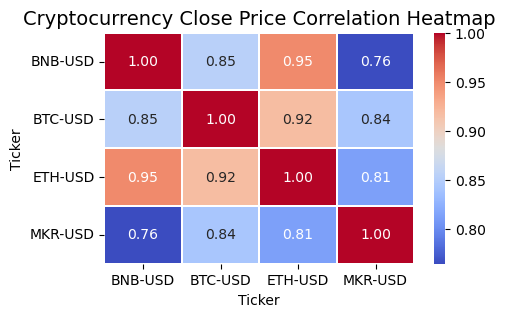

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the heatmap
plt.figure(figsize=(5, 3))

# Generate the heatmap
sns.heatmap(selected_crypto_dataset.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.3)

# Set the title
plt.title("Cryptocurrency Close Price Correlation Heatmap", fontsize=14)

# Display the plot
plt.show()

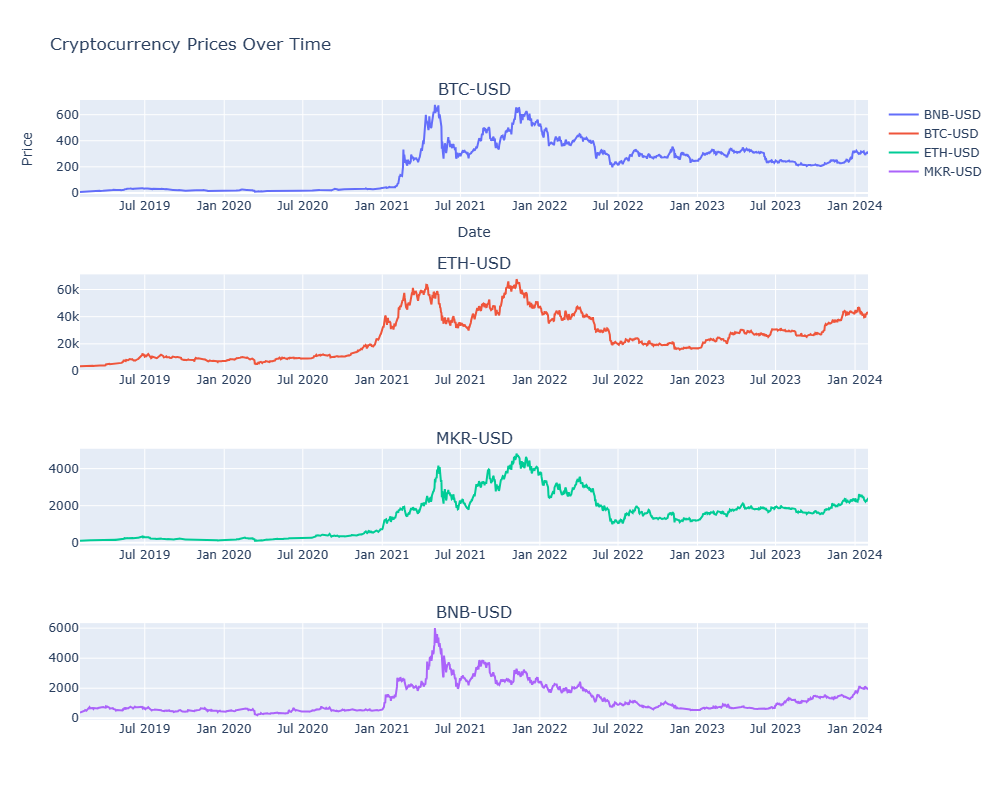

In [22]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create subplots with specified row heights
fig = make_subplots(rows=4, cols=1, subplot_titles=("BTC-USD", "ETH-USD", "MKR-USD", "BNB-USD"), row_heights=[0.3, 0.3, 0.3, 0.3])

# Add traces for each ticker
for i, column in enumerate(selected_crypto_dataset.columns, start=1):
    fig.add_trace(go.Scatter(x=selected_crypto_dataset.index, y=selected_crypto_dataset[column], mode='lines', name=column), row=i, col=1)  # Change row=i+1 to row=i

# Update layout
fig.update_layout(title='Cryptocurrency Prices Over Time', xaxis_title='Date', yaxis_title='Price', height=800)

# Show plot
fig.show()


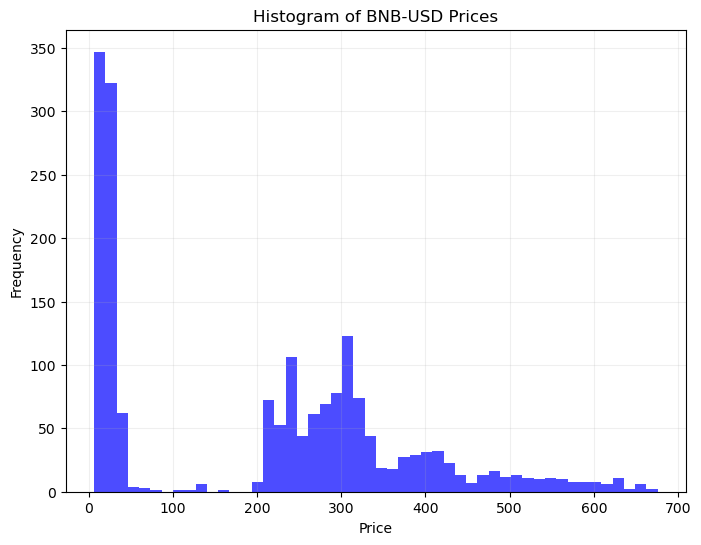

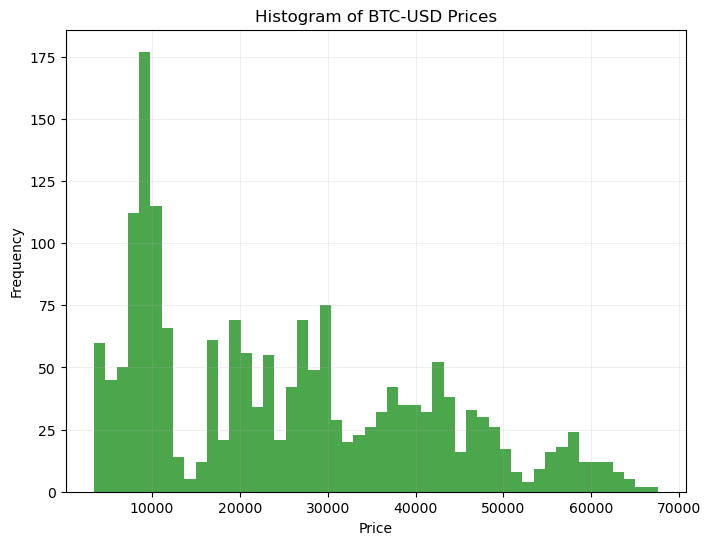

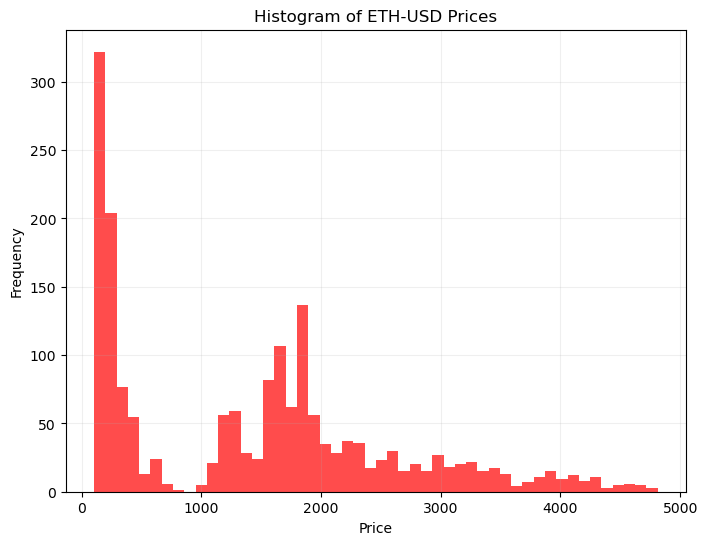

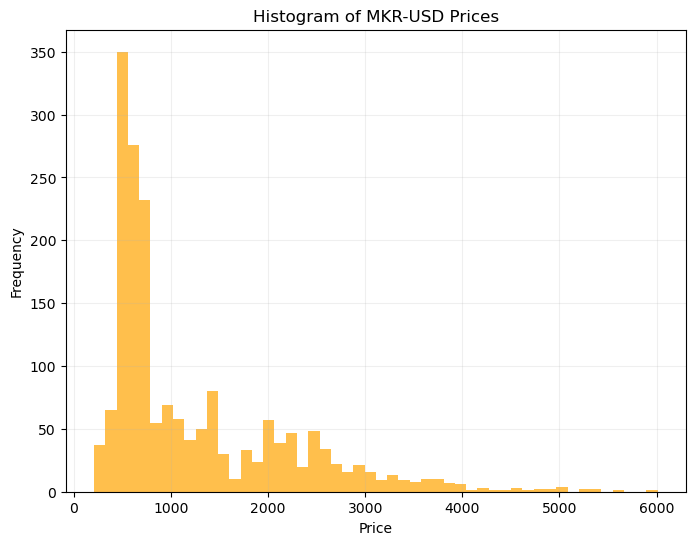

In [23]:
# Define colors for each cryptocurrency
colors = ['blue', 'green', 'red', 'orange']

# Plot histograms for each cryptocurrency with different colors
for i, column in enumerate(selected_crypto_dataset.columns):
    plt.figure(figsize=(8, 6))
    plt.hist(selected_crypto_dataset[column], bins=50, alpha=0.7, color=colors[i])
    plt.title(f'Histogram of {column} Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.2)
    plt.show()


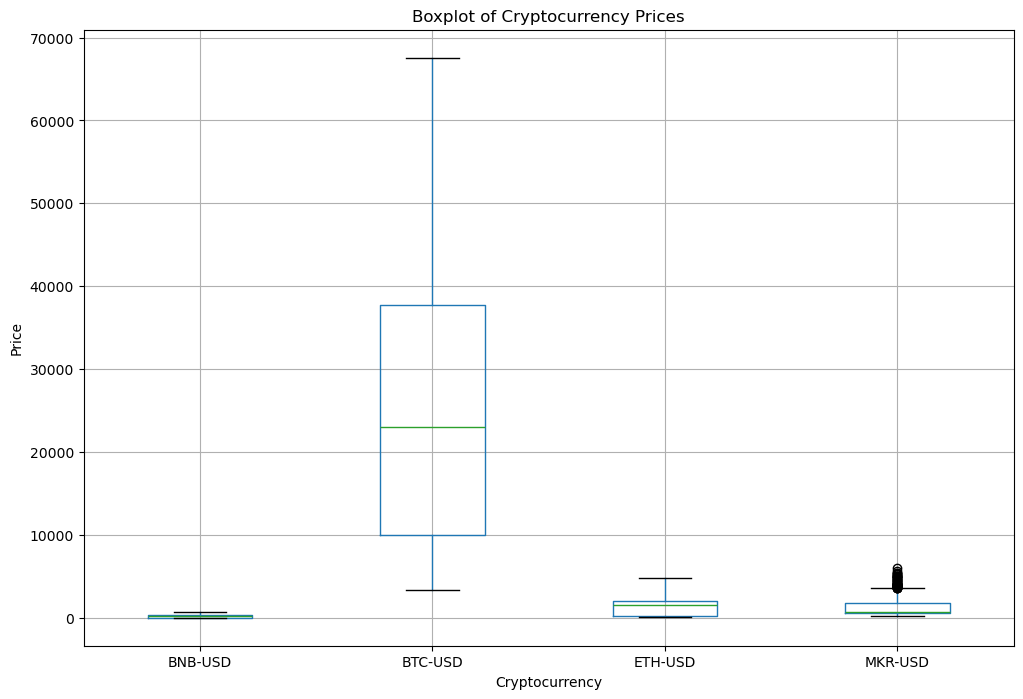

In [24]:
import matplotlib.pyplot as plt

# Plot boxplots for each cryptocurrency
plt.figure(figsize=(12, 8))
selected_crypto_dataset.boxplot()
plt.title('Boxplot of Cryptocurrency Prices')
plt.xlabel('Cryptocurrency')
plt.ylabel('Price')
plt.grid(True)
plt.show()


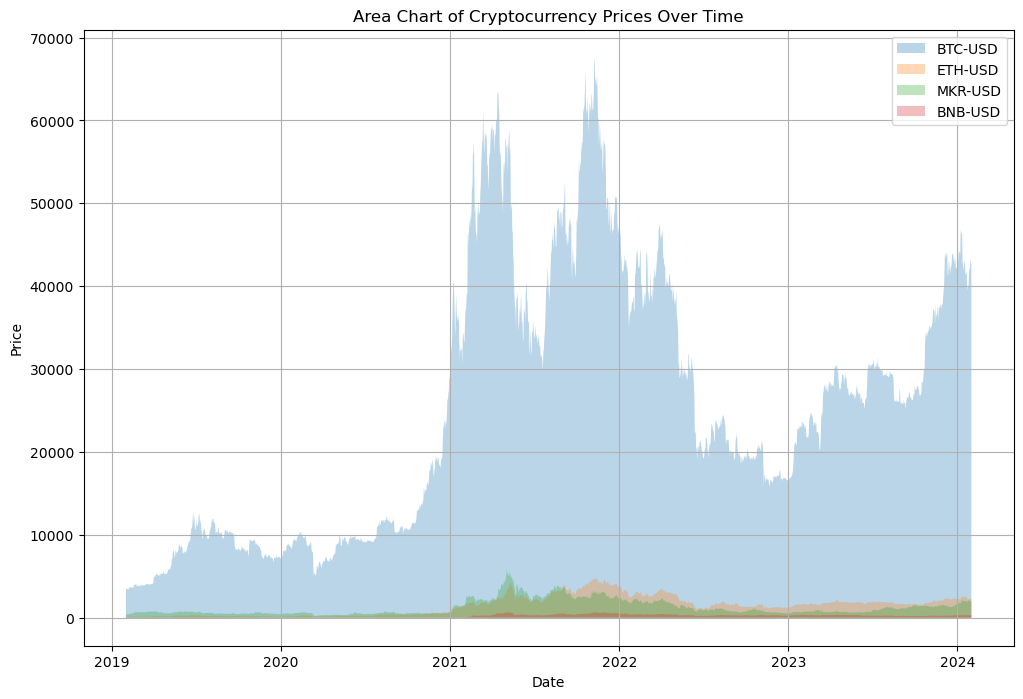

In [25]:

import matplotlib.pyplot as plt

# Plot area chart for each cryptocurrency pair
plt.figure(figsize=(12, 8))
plt.fill_between(selected_crypto_dataset.index, selected_crypto_dataset['BTC-USD'], label='BTC-USD', alpha=0.3)
plt.fill_between(selected_crypto_dataset.index, selected_crypto_dataset['ETH-USD'], label='ETH-USD', alpha=0.3)
plt.fill_between(selected_crypto_dataset.index, selected_crypto_dataset['MKR-USD'], label='MKR-USD', alpha=0.3)
plt.fill_between(selected_crypto_dataset.index, selected_crypto_dataset['BNB-USD'], label='BNB-USD', alpha=0.3)

plt.title('Area Chart of Cryptocurrency Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


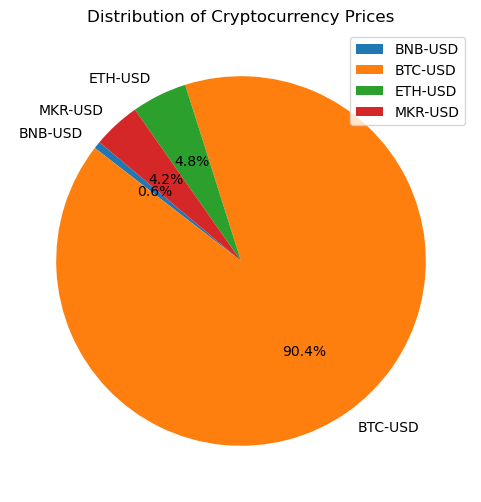

In [26]:
import matplotlib.pyplot as plt

# Aggregate cryptocurrency prices for a specific date
total_prices = selected_crypto_dataset.iloc[-1].sum()

# Calculate the proportion of each cryptocurrency's price within the total
proportions = selected_crypto_dataset.iloc[-1] / total_prices

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(proportions, labels=selected_crypto_dataset.columns, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cryptocurrency Prices')
plt.legend(loc="best")
plt.show()


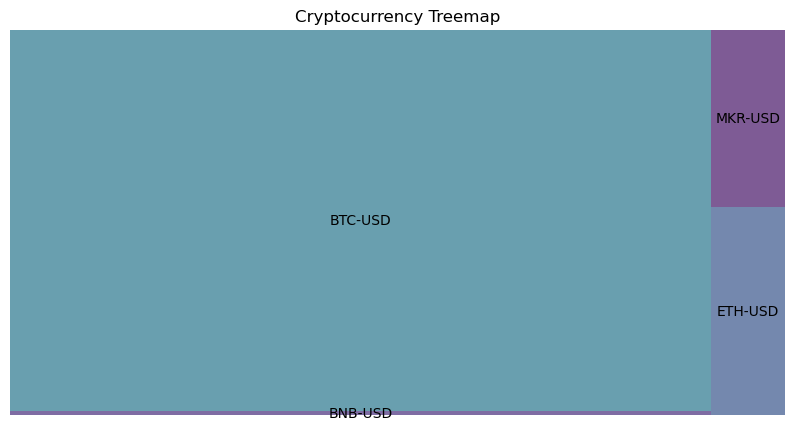

In [27]:
import squarify
# Calculate the total price for each ticker
total_prices = selected_crypto_dataset.sum()

# Plot treemap
plt.figure(figsize=(10, 5))
squarify.plot(sizes=total_prices, label=total_prices.index, alpha=0.7)
plt.axis('off')
plt.title('Cryptocurrency Treemap')
plt.show()


In [28]:
print(selected_crypto_dataset)


Ticker         BNB-USD       BTC-USD      ETH-USD      MKR-USD
Date                                                          
2019-02-01    6.562617   3487.945312   107.609787   369.966766
2019-02-02    6.891695   3521.060791   110.430260   380.962280
2019-02-03    6.738165   3464.013428   107.492668   376.853333
2019-02-04    7.100500   3459.154053   107.821602   407.623444
2019-02-05    7.819810   3466.357422   107.443520   392.125397
...                ...           ...          ...          ...
2024-01-27  305.824829  42120.054688  2267.885986  2002.803589
2024-01-28  304.975616  42035.593750  2257.208740  1959.028320
2024-01-29  310.708008  43288.246094  2317.064209  1974.503052
2024-01-30  307.462738  42952.609375  2344.493652  2025.393921
2024-01-31  300.351074  42582.605469  2282.544434  1960.464355

[1826 rows x 4 columns]


In [29]:
new_df = selected_crypto_dataset

In [30]:
# Reset the index to make 'Date' a regular column
new_df.reset_index(inplace=True)

# Rename the columns
new_df.columns = ['Date', 'BNB-USD', 'BTC-USD', 'ETH-USD', 'MKR-USD']

# Check the DataFrame to ensure the changes are applied correctly
print(new_df.head())


        Date   BNB-USD      BTC-USD     ETH-USD     MKR-USD
0 2019-02-01  6.562617  3487.945312  107.609787  369.966766
1 2019-02-02  6.891695  3521.060791  110.430260  380.962280
2 2019-02-03  6.738165  3464.013428  107.492668  376.853333
3 2019-02-04  7.100500  3459.154053  107.821602  407.623444
4 2019-02-05  7.819810  3466.357422  107.443520  392.125397


#

# LSTM MODEL

In [31]:
from tempfile import NamedTemporaryFile
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import keras
from keras.layers import LSTM, Bidirectional, Dropout, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from pandas.plotting import register_matplotlib_converters


# Define load_historical_data function
def load_historical_data(new_df=None):
    chosen_cryptos = ["BTC-USD", "ETH-USD", "MKR-USD", "BNB-USD"]
    start_date = "2019-02-01"
    end_date = "2024-02-01"
    selected_crypto_dataset = yf.download(chosen_cryptos, start=start_date, end=end_date)
    close_historical_data = selected_crypto_dataset['Close']
    if selected_crypto:
        close_historical_data = close_historical_data[[selected_crypto]]
    return close_historical_data

# Define function to select cryptocurrency
def select_crypto():
    print("Available cryptocurrencies: BTC-USD, ETH-USD, MKR-USD, BNB-USD")
    selected_crypto = input("Enter the cryptocurrency symbol you want to analyze (e.g., BTC-USD): ")
    return selected_crypto.upper()



Available cryptocurrencies: BTC-USD, ETH-USD, MKR-USD, BNB-USD


Enter the cryptocurrency symbol you want to analyze (e.g., BTC-USD):  bnb-usd


[*********************100%%**********************]  4 of 4 completed


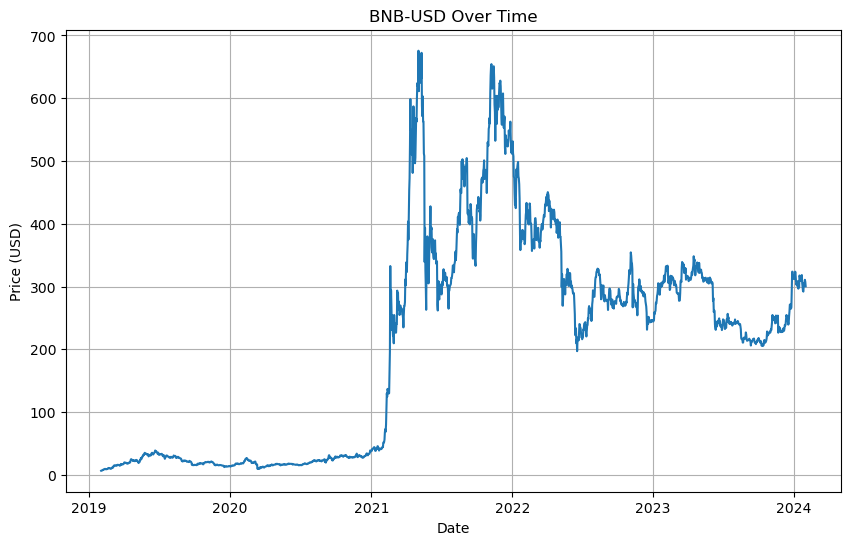

In [32]:
# Load historical data
selected_crypto = select_crypto()  # Choose the cryptocurrency
selected_crypto_data = load_historical_data(selected_crypto)

# Extract 'Date' and 'chosen crypto' columns from the DataFrame
dates = selected_crypto_data.index
crypto_values = selected_crypto_data[selected_crypto]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(dates, crypto_values)
plt.title(f'{selected_crypto} Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


In [33]:
# Prepare the data
train_size = int(len(selected_crypto_data) * 0.7)
test_size = len(selected_crypto_data) - train_size
train = selected_crypto_data.iloc[:train_size]
test = selected_crypto_data.iloc[train_size:]


In [34]:

# Scale the data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)


In [35]:
# Define create_dataset function
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10


In [36]:
# Create datasets for LSTM model
X_train, y_train = create_dataset(train_scaled, train_scaled[:, 0], time_steps)
X_test, y_test = create_dataset(test_scaled, test_scaled[:, 0], time_steps)


In [37]:
# Build the LSTM model
model = Sequential([
    Bidirectional(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(rate=0.2),
    Dense(units=1)
])
model.compile(loss='mean_squared_error', optimizer='adam')

In [38]:
# Define callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
best_model_file = NamedTemporaryFile(suffix='.h5', delete=False)
best_model = ModelCheckpoint(best_model_file.name, save_best_only=True, 
                             monitor='val_loss', mode='min', verbose=1)


In [39]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    shuffle=False,
    callbacks=[early_stopping, best_model]
)


Epoch 1/30

32/36 [=========================>....] - ETA: 0s - loss: 0.1394
Epoch 1: val_loss improved from inf to 0.01457, saving model to C:\Users\jegod\AppData\Local\Temp\tmp9nvx9are.h5
36/36 [==============================] - 9s 55ms/step - loss: 0.1364 - val_loss: 0.0146
Epoch 2/30
35/36 [============================>.] - ETA: 0s - loss: 0.0448
Epoch 2: val_loss did not improve from 0.01457
36/36 [==============================] - 1s 16ms/step - loss: 0.0449 - val_loss: 0.0429
Epoch 3/30
35/36 [============================>.] - ETA: 0s - loss: 0.0312
Epoch 3: val_loss did not improve from 0.01457
36/36 [==============================] - 1s 14ms/step - loss: 0.0309 - val_loss: 0.0264
Epoch 4/30
33/36 [==========================>...] - ETA: 0s - loss: 0.0237
Epoch 4: val_loss did not improve from 0.01457
36/36 [==============================] - 1s 14ms/step - loss: 0.0258 - val_loss: 0.0223
Epoch 5/30
35/36 [============================>.] - ETA: 0s - loss: 0.0250
Epoch 5: val_loss 

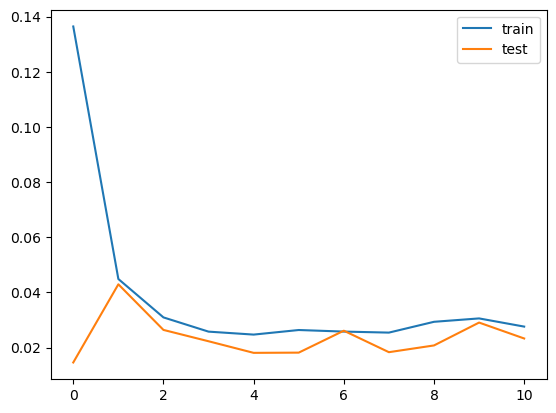

In [40]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [41]:
# Load the best model
best_model = keras.models.load_model(best_model_file.name)

# Make predictions
y_pred = best_model.predict(X_test)


17/17 [==============================] - 1s 3ms/step


In [42]:
# Inverse transform the predictions and true values
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

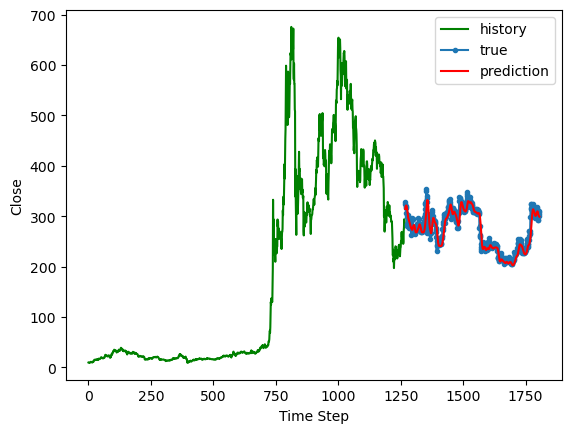

In [43]:
# Plot the results
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Close')
plt.xlabel('Time Step')
plt.legend()
plt.show()



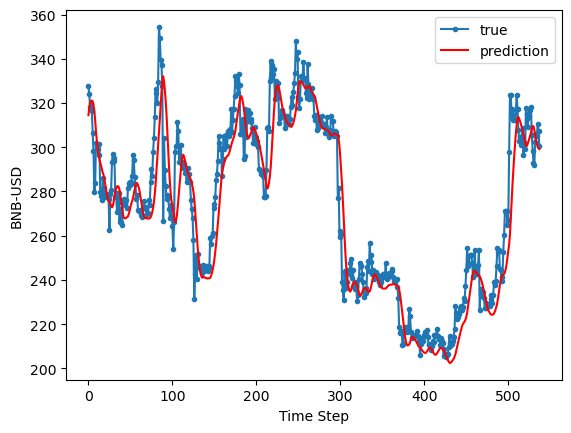

In [44]:

plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel(selected_crypto)
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

# Calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

# Calculate MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)

# Calculate R2 score
r2 = r2_score(y_test_inv, y_pred_inv)

print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)


RMSE: 14.639999046626667
MAPE: 3.7527607727126107
MSE: 214.3295720852297
MAE: 10.377736598585617
R2 Score: 0.8527233158461939


#

# PROPHET MODEL

In [46]:
from prophet import Prophet

# Download historical data for the past year
def load_historical_data(new_df=None):
    chosen_cryptos = ["BTC-USD", "ETH-USD", "MKR-USD", "BNB-USD"]
    start_date = "2019-02-01"
    end_date = "2024-02-01"
    selected_crypto_dataset = yf.download(chosen_cryptos, start=start_date, end=end_date)
    close_historical_data = selected_crypto_dataset['Close']
    if selected_crypto:
        close_historical_data = close_historical_data[[selected_crypto]]
    return close_historical_data


# Load historical data for selected cryptocurrency
def load_data(selected_crypto=None):
    data = load_historical_data(selected_crypto)
    data.reset_index(inplace=True)
    data.columns = ['ds', 'y']
    return data

# Predict using Prophet
def predict_prophet(data):
    model = Prophet()
    model.fit(data)
    future_dates = model.make_future_dataframe(periods=360)
    prediction = model.predict(future_dates)
    return model, prediction

# Allow user to select cryptocurrency
selected_crypto = input("Enter the cryptocurrency (e.g., BTC-USD, ETH-USD, MKR-USD, BNB-USD): ").upper()

# Load data for selected cryptocurrency
data = load_data(selected_crypto)

# Predict using Prophet
model, prediction = predict_prophet(data)



Enter the cryptocurrency (e.g., BTC-USD, ETH-USD, MKR-USD, BNB-USD):  bnb-usd


[*********************100%%**********************]  4 of 4 completed
22:10:30 - cmdstanpy - INFO - Chain [1] start processing
22:10:31 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1500x1200 with 0 Axes>

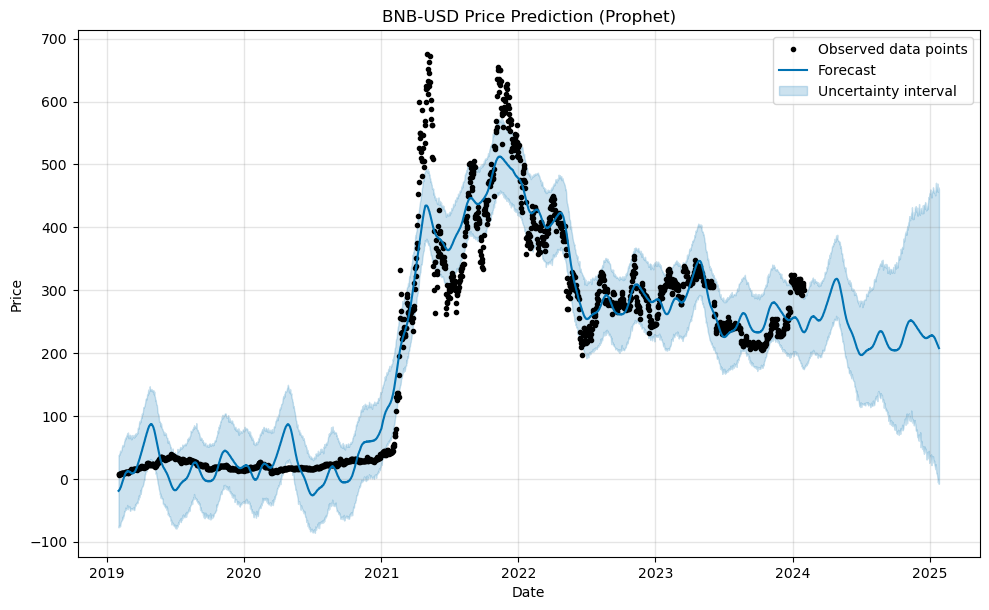

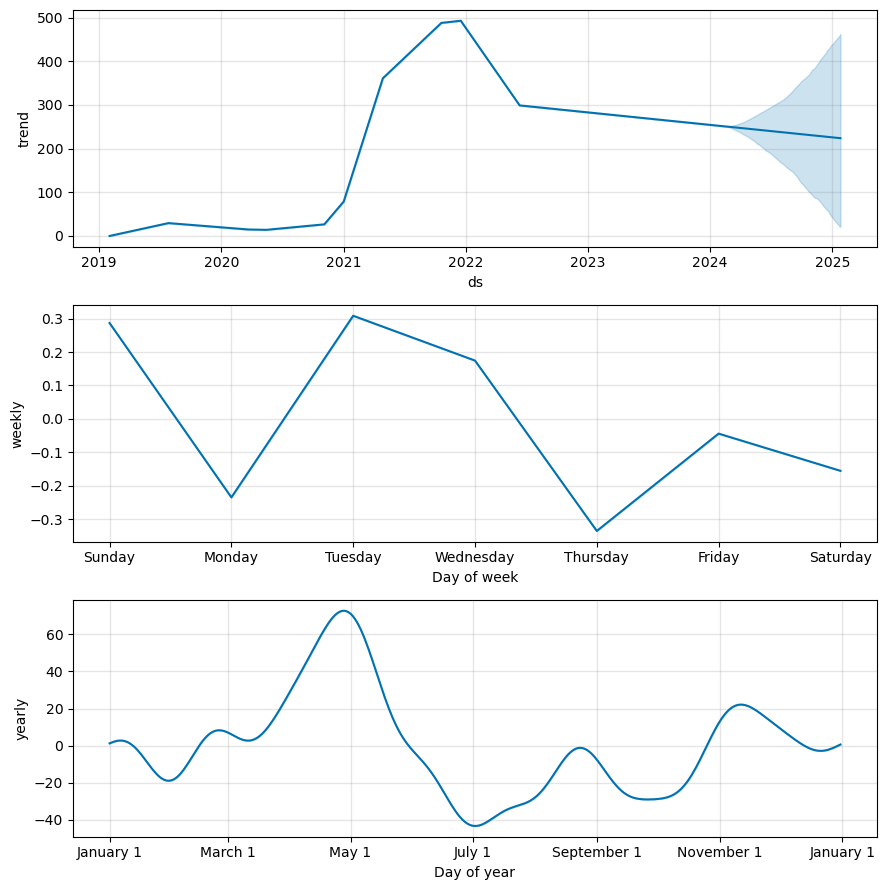

In [47]:
# Plot prediction and components

plt.figure(figsize=(15,12))
fig = model.plot(prediction)

plt.title(f'{selected_crypto} Price Prediction (Prophet)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

fig2 = model.plot_components(prediction)
plt.show()

In [48]:

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(data['y'], prediction['yhat'][:len(data)]))

# Calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(data['y'], prediction['yhat'][:len(data)])

# Calculate MSE
mse = mean_squared_error(data['y'], prediction['yhat'][:len(data)])

# Calculate MAE
mae = mean_absolute_error(data['y'], prediction['yhat'][:len(data)])

# Calculate R2 score
r2 = r2_score(data['y'], prediction['yhat'][:len(data)])

print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)


RMSE: 44.49320989033352
MAPE: 53.439701664674764
MSE: 1979.6457263452726
MAE: 31.894139863261035
R2 Score: 0.9335615941931595


In [49]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)


def load_historical_data(new_df=None):
    chosen_cryptos = ["BTC-USD", "ETH-USD", "MKR-USD", "BNB-USD"]
    start_date = "2019-02-01"
    end_date = "2024-02-01"
    selected_crypto_dataset = yf.download(chosen_cryptos, start=start_date, end=end_date)
    try:
        close_historical_data = selected_crypto_dataset['Close']
        if selected_crypto:
            close_historical_data = close_historical_data[selected_crypto.upper()]
        return close_historical_data
    except KeyError:
        print("Error: The selected cryptocurrency is not available.")
        print("Available cryptocurrencies:")
        print(", ".join(chosen_cryptos))
        return None


In [50]:
# Load historical data
while True:
    selected_crypto = input("Enter the cryptocurrency symbol you want to analyze (e.g., BTC-USD): ").upper()
    selected_crypto_data = load_historical_data(selected_crypto)
    if selected_crypto_data is not None:
        break


Enter the cryptocurrency symbol you want to analyze (e.g., BTC-USD):  bnb-usd


[*********************100%%**********************]  4 of 4 completed


In [51]:
# Reshape the data to a 2D array
selected_crypto_data_2d = selected_crypto_data.values.reshape(-1, 1)

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_crypto_data_2d)


In [52]:
# Split the scaled data into training and testing sets
split_data = int(len(scaled_data) * 0.9)
training_data = scaled_data[:split_data]
testing_data = scaled_data[split_data:]

In [53]:
# Build ARIMA model
model_predictions = []
n_test_obser = len(testing_data)

for i in range(n_test_obser):
    model = ARIMA(training_data, order=(4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data = np.append(training_data, [actual_test_value])


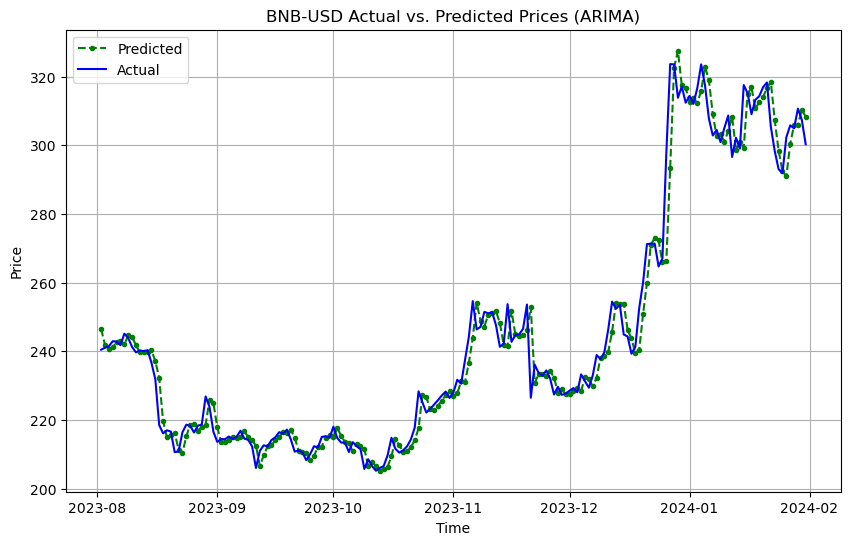

In [54]:
# Inverse transform the predicted and actual values to the original scale
model_predictions = scaler.inverse_transform(np.array(model_predictions).reshape(-1, 1)).flatten()
actual_values = scaler.inverse_transform(testing_data.reshape(-1, 1)).flatten()

# Plotting the actual and predicted values
plt.figure(figsize=(10, 6))
plt.grid()
date_range = selected_crypto_data[split_data:].index
plt.plot(date_range, model_predictions, color='green', marker='.', linestyle='dashed', label='Predicted')
plt.plot(date_range, actual_values, color='b', label='Actual')  # Plotting actual values
plt.title(f'{selected_crypto} Actual vs. Predicted Prices (ARIMA)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



#print(model_fit.summary())

In [55]:

# Compute RMSE
rmse = np.sqrt(mean_squared_error(actual_values, model_predictions))

# Compute MAPE
mape = mean_absolute_percentage_error(actual_values, model_predictions)

# Compute MSE
mse = mean_squared_error(actual_values, model_predictions)

# Compute MAE
mae = mean_absolute_error(actual_values, model_predictions)

# Compute R2 Score
r2 = r2_score(actual_values, model_predictions)

# Print evaluation metrics
print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)


RMSE: 6.062873399317104
MAPE: 1.4915165159462178
MSE: 36.75843385614693
MAE: 3.786827426220685
R2 Score: 0.9710559500066754


Enter the cryptocurrency symbol you want to analyze (e.g., BTC-USD):  bnb-usd


[*********************100%%**********************]  4 of 4 completed


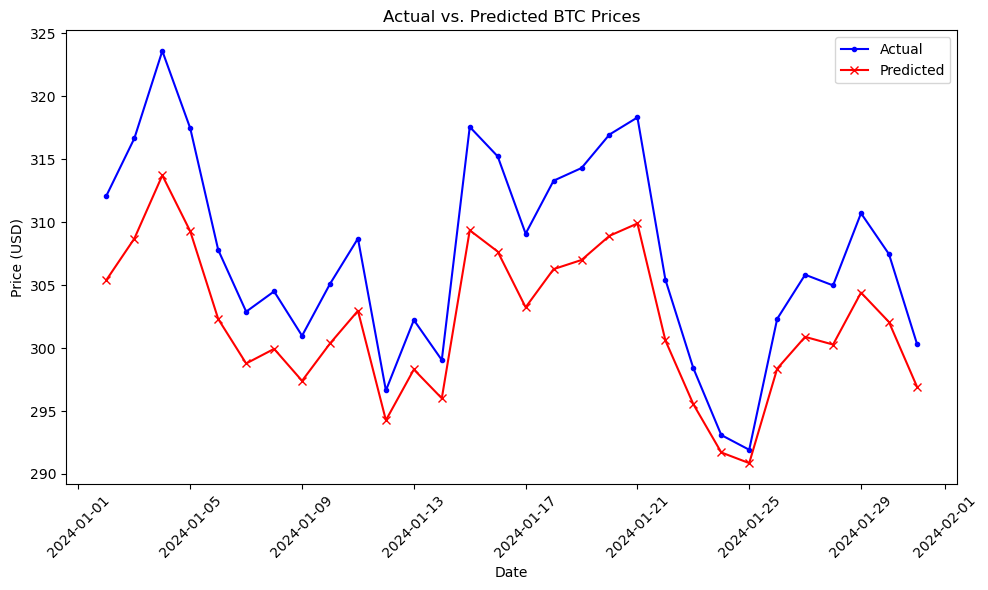

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


# Define function to load historical data
def load_historical_data(selected_crypto):
    chosen_cryptos = ["BTC-USD", "ETH-USD", "MKR-USD", "BNB-USD"]
    start_date = "2019-02-01"
    end_date = "2024-02-01"
    selected_crypto_dataset = yf.download(chosen_cryptos, start=start_date, end=end_date)
    try:
        close_historical_data = selected_crypto_dataset['Close']
        if selected_crypto:
            close_historical_data = close_historical_data[selected_crypto.upper()]
        return close_historical_data
    except KeyError:
        print("Error: The selected cryptocurrency is not available.")
        print("Available cryptocurrencies:")
        print(", ".join(chosen_cryptos))
        return None

# Load historical data for selected cryptocurrency
while True:
    selected_crypto = input("Enter the cryptocurrency symbol you want to analyze (e.g., BTC-USD): ").upper()
    selected_crypto_data = load_historical_data(selected_crypto)
    if selected_crypto_data is not None:
        break

# Define prediction days
prediction_days = 30

# Create another column shifted n units up
btc_df = selected_crypto_data.to_frame()
btc_df['Prediction'] = btc_df[selected_crypto].shift(-prediction_days)

# Prepare features (X) and target (y)
X = np.array(btc_df.drop(['Prediction'], axis=1))
X = X[:-prediction_days]
y = np.array(btc_df['Prediction'])
y = y[:-prediction_days]


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Prepare prediction days array
prediction_days_array = np.array(btc_df.drop(['Prediction'], axis=1))[-prediction_days:]

# Create and train the support Vector Machine (Regression) using radial basis function
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

# Calculate confidence score
svr_rbf_confidence = svr_rbf.score(x_test, y_test)

#print(svr_rbf_confidence)


# Perform predictions
svm_prediction = svr_rbf.predict(x_test)
svm_prediction_future = svr_rbf.predict(prediction_days_array)

# Convert prediction dates to datetime objects
prediction_dates = pd.to_datetime(btc_df.index[-prediction_days:])

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(prediction_dates, y[-prediction_days:], label='Actual', color='blue', marker='.')
plt.plot(prediction_dates, svm_prediction_future, label='Predicted', color='red', marker='x')

plt.title('Actual vs. Predicted BTC Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


In [57]:

# Calculate evaluation metrics
mse = mean_squared_error(y_test, svm_prediction)
mae = mean_absolute_error(y_test, svm_prediction)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - svm_prediction) / y_test)) * 100
r2 = r2_score(y_test, svm_prediction)

# Print evaluation metrics
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

print("R2 Score:", r2)




MSE: 5009.858348275413
MAE: 39.02430492808833
RMSE: 70.78035284085135
MAPE: 16.74445604332479
R2 Score: 0.8396623286480048
